In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
import yaml

# Import du dataset

In [370]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhrubangtalukdar/200-years-of-global-major-earthquakes-18262026")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\trist\.cache\kagglehub\datasets\dhrubangtalukdar\200-years-of-global-major-earthquakes-18262026\versions\1


In [371]:
df = pd.read_csv(f"{path}/earthquake1826_2026.csv")

# Exploration

In [372]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2026-01-07 22:00:13.258000+00:00,-23.4332,-179.8984,547.033,5.5,mww,63.0,39.0,5.976,1.13,us7000rnbi,2026-01-07T22:24:28.537Z,south of the Fiji Islands,earthquake,8.66,7.704,0.093,11.0,reviewed
1,2026-01-07 04:12:56.792000+00:00,7.2863,127.0595,11.854,5.5,mww,58.0,53.0,1.485,1.40,us7000rn4a,2026-01-07T16:31:18.040Z,"53 km E of Santiago, Philippines",earthquake,5.21,4.721,0.098,10.0,reviewed
2,2026-01-07 03:02:56.040000+00:00,7.3902,126.7221,35.000,6.4,mww,118.0,30.0,1.178,1.17,us7000rn2z,2026-01-07T15:50:12.915Z,"16 km ESE of Baculin, Philippines",earthquake,7.94,1.842,0.047,44.0,reviewed
3,2026-01-06 23:10:38.371000+00:00,-17.6276,168.2465,62.384,5.0,mww,47.0,79.0,2.388,0.54,us7000rn1j,2026-01-07T12:59:00.885Z,"13 km NNW of Port-Vila, Vanuatu",earthquake,9.64,6.266,0.103,9.0,reviewed
4,2026-01-06 19:17:09.696000+00:00,37.2523,74.6137,10.000,5.2,mb,112.0,54.0,1.991,0.88,us7000rmzt,2026-01-07T05:04:55.711Z,"103 km N of Barishal, Pakistan",earthquake,6.54,1.848,0.049,136.0,reviewed


In [373]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,106077.000000,106077.000000,105484.000000,106077.000000,31347.000000,41986.000000,21402.000000,74560.000000,19983.000000,54440.000000,36554.000000,42353.000000
mean,3.794865,40.265552,61.576360,5.452841,157.568507,63.119420,4.236853,0.960075,7.834729,7.982370,0.171523,54.878497
std,30.328921,121.991382,107.751084,0.485270,126.397291,38.590796,5.211970,0.372130,8.643364,10.727341,0.152104,82.993485
min,-77.080000,-179.997000,-4.000000,5.000000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,-17.741000,-72.395000,12.000000,5.100000,68.000000,36.000000,1.271000,0.810000,6.030000,1.977500,0.060000,12.000000
50%,-0.569000,99.069000,33.000000,5.300000,118.000000,54.700000,2.533000,0.970000,7.500000,4.900000,0.100000,27.000000
75%,30.160000,142.820000,50.300000,5.700000,210.000000,80.675000,5.008750,1.100000,9.200000,9.600000,0.210000,61.000000
max,87.386000,180.000000,700.000000,9.500000,934.000000,360.000000,41.046000,69.320000,778.000000,1091.900000,1.840000,1027.000000


In [374]:
corr = df.corr(numeric_only=True)

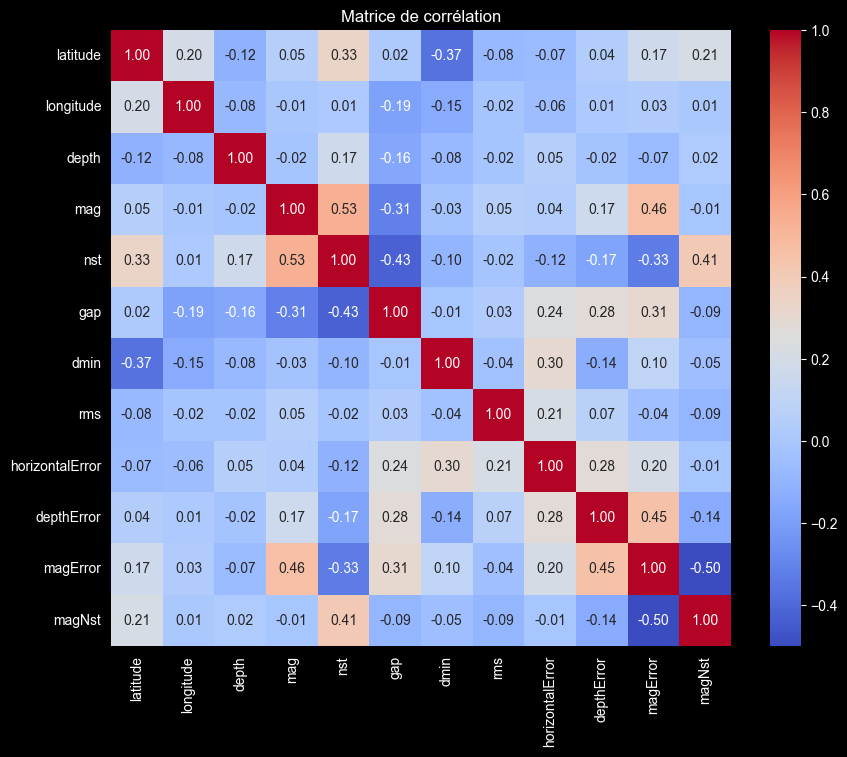

In [375]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Datacard

In [376]:
n = len(df)

datacard = {
    "name": "200-years-of-global-major-earthquakes",
    "version": "1.0",
    "created": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "domain": "seismology",
    "period": "1826-2026",
    "data": {
        "instance_count": n,
        "feature_count": df.shape[1],
        "feature_list": {},
    }
}

description = {
    "time": "Date et heure du séisme",
    "latitude": "Latitude du séisme",
    "longitude": "Longitude du séisme",
    "depth": "Profondeur en kilomètre du tremblement",
    "mag": "Magnitude du séisme",
    "magType": "Échelle de magnitude utilisée",
    "nst": "Nombre de stations sismiques utilisées",
    "gap": "Écart azimutal indiquant la couverture de la station",
    "dmin": "Distance minimale de la station sismique la plus proche",
    "rms": "Racine carré moyenne des résidus de temps de trajet",
    "id": "Identifiant unique",
    "updated": "Date et heure de la mise à jour de la donnée",
    "place": "Localisation (ville)",
    "type": "Cause du séisme",
    "horizontalError": "La distance d'incertitude",
    "depthError": "La profondeur d'incertitude",
    "magError": "La magnitude  d'incertitude",
    "magNst": "Le nombre de stations sismiques qui ont évalué la magnitude",
    "status": "Savoir si l'information a été vérifiée ou saisie automatiquement",
}

df_stats = pd.DataFrame({
    "count": df.count(),
    "unique_count": df.nunique(),
    "duplicate_count": n - df.nunique(),
    "duplicate_ratio": np.round((n - df.nunique()) / n, 2),
    "missing_count": df.isna().sum(),
    "missing_ratio": np.round(df.isna().sum() / n, 2),
})
describe = df.describe()

for idx, row in df_stats.iterrows():
    card = {
        "description": description.get(idx, ""),
        "type": str(df[idx].dtypes),
        "stats": row.to_dict()
    }

    if pd.api.types.is_numeric_dtype(df[idx]):
        card.update({
            'stats': {
                **row.to_dict(),
                **describe[idx].to_dict()
            }
        })

    card.update({
        "sample": df[idx].dropna().unique()[:5].tolist()
    })

    datacard["data"]["feature_list"][idx] = card

In [377]:
with open("../data/transformed_data.yaml", "w", encoding="utf-8") as f:
    yaml.safe_dump(datacard, f, sort_keys=False, allow_unicode=True)